##### Import libraries

In [64]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

##### With this function we can see the different's datasets available on tensorflow datasets

In [65]:
#// omit
#tfds.list_builders()

##### Load the dataset that we are going to use in this case celeb_a

In [66]:
dataset, info = tfds.load('celeb_a', split='test',shuffle_files=False, with_info=True)

##### If you are having trouble downloading the dataset, please uncomment this code and  follow the steps below to download it manually.

In [67]:
#// omit
"""from os import path
tfds_root = 'res'
celeb_path = path.join(tfds_root. 'celeb_a.zip')
celeb_dir = celeb_path.replace('.zip', '')

if not path.exists(tfds_root):
    os.mkdir(tfds_root) """

"from os import path\ntfds_root = 'res'\nceleb_path = path.join(tfds_root. 'celeb_a.zip')\nceleb_dir = celeb_path.replace('.zip', '')\n\nif not path.exists(tfds_root):\n    os.mkdir(tfds_root) "

##### Download the dataset

In [68]:
#// omit
"""import gdown
url = 'YOUR_DATASET_URL'
gdown.download(url,celeb_path, quiet = False) """

"import gdown\nurl = 'YOUR_DATASET_URL'\ngdown.download(url,celeb_path, quiet = False) "

##### Unzip the dataset

In [69]:
# // omit
"""import zipfile as zp
with zp.ZipFile(celeb_path, 'r') as zipp:
    zipp.extractall(celeb_dir) """

"import zipfile as zp\nwith zp.ZipFile(celeb_path, 'r') as zipp:\n    zipp.extractall(celeb_dir) "

##### Load the dataset

In [70]:
#// omit
#dataset, info = tfds.load('celeb_a',  split='test',  shuffle_files=False,  with_info=True,  data_dir= tfds_root)

#### Generate new image

In [71]:
batch_size = 1000
dataset_b = dataset.batch(batch_size)
features = next(iter(dataset_b.take(1)))
dims = features['image'].shape
print(f"Shape of Tensor =  {dims[0]} elements, Size = {dims[1]} x {dims[2]} x {dims[3]}")

Shape of Tensor =  1000 elements, Size = 218 x 178 x 3


In [72]:
def show_image(image):
    fig = plt.figure(figsize=(10,8))
    plt.imshow(image.astype(np.uint8))
    plt.axis('off')
    plt.show()

In [73]:
def generate_image_mean(sample_images):
    return np.mean(sample_images, axis=0)

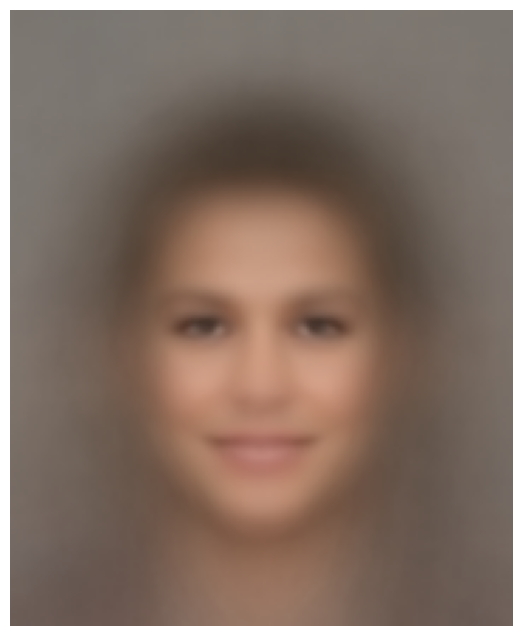

In [74]:
sample_images = features['image']
show_image(generate_image_mean(sample_images))

#### Generate image by attribute

In [75]:
#Get All the attributes
list(features['attributes'].keys())

['5_o_Clock_Shadow',
 'Arched_Eyebrows',
 'Attractive',
 'Bags_Under_Eyes',
 'Bald',
 'Bangs',
 'Big_Lips',
 'Big_Nose',
 'Black_Hair',
 'Blond_Hair',
 'Blurry',
 'Brown_Hair',
 'Bushy_Eyebrows',
 'Chubby',
 'Double_Chin',
 'Eyeglasses',
 'Goatee',
 'Gray_Hair',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Mustache',
 'Narrow_Eyes',
 'No_Beard',
 'Oval_Face',
 'Pale_Skin',
 'Pointy_Nose',
 'Receding_Hairline',
 'Rosy_Cheeks',
 'Sideburns',
 'Smiling',
 'Straight_Hair',
 'Wavy_Hair',
 'Wearing_Earrings',
 'Wearing_Hat',
 'Wearing_Lipstick',
 'Wearing_Necklace',
 'Wearing_Necktie',
 'Young']

In [76]:
def filter_dataset(dataset, attributes, batch_size, dims):
    samples = np.empty([0, dims[1], dims[2], dims[3]])
    for features in dataset.take(len(dataset)-1):
        sub_samples = filter_batch(features, attributes, batch_size)
        samples = np.append(samples, sub_samples, axis=0)
    return samples

In [77]:
def filter_batch(features, attributes, batch_size):
    attribute_values = np.empty((batch_size, len(attributes)))
    for i, (key, value) in enumerate(attributes.items()):
        attribute_values[:, i] = features['attributes'][key]
    filter_list = np.all(attribute_values == np.array(list(attributes.values())), axis=1)
    return features['image'][filter_list]

Sample Size 15


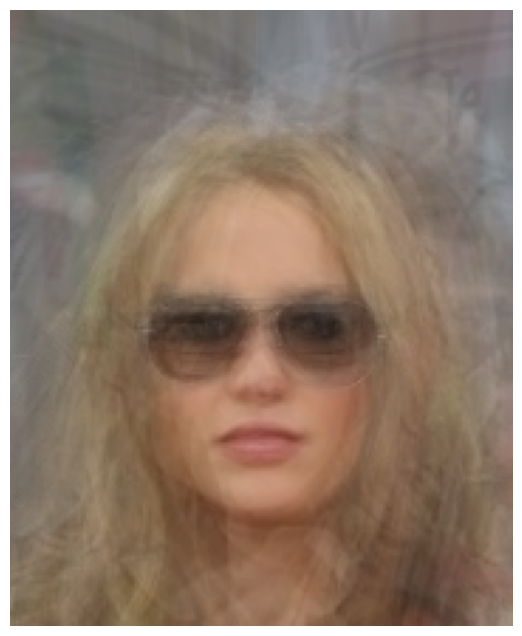

In [78]:
attributes = {
    'Male': False,
    'Blond_Hair': True,
    'Smiling': False,
    'Young': True,
    'Eyeglasses': True
}

sample_images = filter_dataset(dataset_b, attributes, batch_size, dims)
print(f"Sample Size {len(sample_images)}")
show_image(generate_image_mean(sample_images))